# Spreading Cell Division Butter 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import seaborn as sns
import cbbtn_utilities as cb
sns.set_context('talk')
sns.set()
%matplotlib inline

Let $\nu_t$, $e_t$, and $f_t$ be the number of verticies, edges, and faces after cell division $t$. Assuming uniform cell division times, The total number of faces (cells) will double with each cell division, 
$$
f_t = 2 f_{t - 1}
$$

Each cell division results in two new vertices and three edges, the number of vertices at time t is

$$
\nu_t = \nu_{t -1} + 2  f_{t - 1}
$$

and the number of edges is

$$
e_t = e_{t -1} + 3 f_{t - 1}
$$

Neglecting boundary conditions inthe long time limit, the average number of sides $s$ at division $t$

$$
s_t = {2(e_{t -1} + 3 f_{t-1}) \over 2 f_{t-1}} = {s_{t-1} \over 2} + 3
$$

The recurrence system is sovable for the state of the epithelian network as a function of the initial network at time $t = 0$ as

$$
s_t = 6 + 2^{-t}(s_0 - 6)
$$

This shows that the average number of cell sides exponetially approaches six, consistent iwth Euler's theorem. 

This can be modeled using a discrete markov process. The state of a cell $s$  can be defined as its number of sides, which is greater than 3 (no triangular cells). The probability of an $s$ sided cell $p_{s}$ at generation $t$ can be described by an infinite row vector 

$$
\vec{p}^{(t)} = [p_4, p_5, p_6, p_7, p_8, p_9, \dots]
$$

The state dynamics can be described as 

$$
\vec{p}^{(t + 1)} = \vec{p}^{(t)} \mathbf{PS}
$$

where P and S are probabalistic transition matrices. The entry $\mathbf{P}_{i,j}$ describes the probability of cell with $i$ sides will become a cell with $j$ sides after cell division. The shift matrix $\mathbf{S}$ comes from a topological argument that cells will, on average, **gain** one side from the division of neighboring cells. THe shift matrix is therefore defined only on the diagonal with $0$ and $1$. 

Therefore, given a distribution of polygonal cell types $\vec{p}^{(t)}$,we can compute the new distribution after a single round of division.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


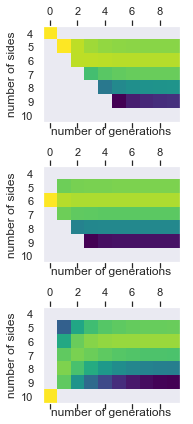

In [24]:
# Define the parameters
n_sides = 7 # Redifining index 0 as minimum 4 sides.
n_gen = 10 

# Set up the transition matrix and normalize. 
P = scipy.linalg.pascal(n_sides, exact=False, kind='lower')
S = np.zeros_like(P)
for i in range(n_sides - 1):
    S[i, i+1] = 1
for i in range(n_sides):
    P[i, :] = P[i, :] / np.sum(P[i, :])

    
       
# Generate the total subplots. 
fig, ax = plt.subplots(3, 1, figsize=(6, 6))
for a in ax:
    a.grid(False)
    a.set_yticklabels(['', 4, 5, 6, 7, 8, 9, 10])
    a.set_ylabel('number of sides')
    a.set_xlabel('number of generations')

inits = [0, 2, 6]
for i, init in enumerate(inits):
    # Define the probability and the intial condition.
    prob = np.zeros((n_sides, n_gen))

    # Set the initial condition. 
    prob[init, 0] = 1.0

    # Loop through each generation
    for t in range(1, n_gen):       
        # Loop through
        for j in range(1, n_sides - 1):
            # Compute the probability of getting a vertex 
            prob[j, t] = np.sum(prob[:, t-1] * P[:, j-1])
   
    # Plot it on the correct axis. 
    ax[i].matshow(np.log(prob), cmap='viridis')
 
plt.tight_layout()
plt.savefig('gibson_butter.png', dpi=300, bbox_inches='tight')

In [233]:
prob[:, -1]

array([0.        , 0.27623794, 0.44523786, 0.20170003, 0.03532069,
       0.0027103 , 0.        ])